In [10]:
import os
import time

import pandas as pd

from collab.foraging import toolkit as ft

root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("."))))

# the smoke test code is to make sure that the code runs without error
# during continuous integration
# can be ignored by the reader
smoke_test = "CI" in os.environ
frames = 150 if smoke_test else 300
frames_sps = 150 if smoke_test else 2300
sampling_rate = 0.001 if smoke_test else 0.01

notebook_starts = time.time()

# Import raw .csv files of positions and angles for each age

In [11]:
fish_raw_2wpf = pd.read_csv(
    os.path.join(
        root,
        "data/fish_all_ages/2wpf_091522_6.csv",
    )
)

fish_raw_4wpf = pd.read_csv(
    os.path.join(
        root,
        "data/fish_all_ages/4wpf_060222_1.csv",
    )
)

fish_raw_6wpf = pd.read_csv(
    os.path.join(
        root,
        "data/fish_all_ages/6wpf_061522_1.csv",
    )
)

fish_raw_8wpf = pd.read_csv(
    os.path.join(
        root,
        "data/fish_all_ages/8wpf_091622_2.csv",
    )
)

# Remove all frames where *any* fish goes missing


PS: I am keeping the unprocessed data files in the repo for now, just in case I want to use a different method to deal with nans later on

PPS: This could potentially be packaged into a function in toolkit if it is of general use?

In [12]:
# find rows of dataframe with nan values
nan_rows = fish_raw_2wpf.index[fish_raw_2wpf.isna().any(axis=1)]

# find timepoints corresponding to these rows (have to do this since dataframe is flattened in the fish dimension)
timepoints = fish_raw_2wpf["time"][nan_rows]

# filter out those timepoints
fish_filtered_2wpf = fish_raw_2wpf[~fish_raw_2wpf["time"].isin(timepoints)]

# repeating for other ages
# 4wpf
nan_rows = fish_raw_4wpf.index[fish_raw_4wpf.isna().any(axis=1)]
timepoints = fish_raw_4wpf["time"][nan_rows]
fish_filtered_4wpf = fish_raw_4wpf[~fish_raw_4wpf["time"].isin(timepoints)]

# 6wpf
nan_rows = fish_raw_6wpf.index[fish_raw_6wpf.isna().any(axis=1)]
timepoints = fish_raw_6wpf["time"][nan_rows]
fish_filtered_6wpf = fish_raw_6wpf[~fish_raw_6wpf["time"].isin(timepoints)]

# 8wpf
nan_rows = fish_raw_8wpf.index[fish_raw_8wpf.isna().any(axis=1)]
timepoints = fish_raw_8wpf["time"][nan_rows]
fish_filtered_8wpf = fish_raw_8wpf[~fish_raw_8wpf["time"].isin(timepoints)]

2 week old fish are in a smaller arena (150mm diameter) compared to older fish (300mm diameter). Different ages also have different characteristic length scales (e.g., swimming speeds, body length, interaction distance)

To allow for comparison across ages, we need the distance between grid points to be the same in absolute units for all ages.

Choose:

2wpf: 90 x 90 grid spanning 0 to 150mm in each direction

4-8wpf: 180 x 180 grid spanning 0 to 300mm in each direction

In [13]:
gridSizes = {"2wpf": 90, "4wpf": 180, "6wpf": 180, "8wpf": 180}

gridMaxes = {"2wpf": 150, "4wpf": 300, "6wpf": 300, "8wpf": 300}

fish_filtered_2wpf = fish_filtered_2wpf.rename(columns={"fish": "forager"})
fish_filtered_4wpf = fish_filtered_4wpf.rename(columns={"fish": "forager"})
fish_filtered_6wpf = fish_filtered_6wpf.rename(columns={"fish": "forager"})
fish_filtered_8wpf = fish_filtered_8wpf.rename(columns={"fish": "forager"})

# subsample in time for testing
frames = 300

fish_filtered_2wpf = ft.subset_frames_evenly_spaced(fish_filtered_2wpf, frames)
fish_filtered_2wpf = ft.rescale_to_grid(
    fish_filtered_2wpf, size=gridSizes["2wpf"], gridMin=0, gridMax=gridMaxes["2wpf"]
)
fish_2wpf_obj = ft.object_from_data(
    fish_filtered_2wpf,
    grid_size=gridSizes["2wpf"],
    frames=fish_filtered_2wpf["time"].max(),
    calculate_step_size_max=True,
)

fish_filtered_4wpf = ft.subset_frames_evenly_spaced(fish_filtered_4wpf, frames)
fish_filtered_4wpf = ft.rescale_to_grid(
    fish_filtered_4wpf, size=gridSizes["4wpf"], gridMin=0, gridMax=gridMaxes["4wpf"]
)
fish_4wpf_obj = ft.object_from_data(
    fish_filtered_4wpf,
    grid_size=gridSizes["4wpf"],
    frames=fish_filtered_4wpf["time"].max(),
    calculate_step_size_max=True,
)

fish_filtered_6wpf = ft.subset_frames_evenly_spaced(fish_filtered_6wpf, frames)
fish_filtered_6wpf = ft.rescale_to_grid(
    fish_filtered_6wpf, size=gridSizes["6wpf"], gridMin=0, gridMax=gridMaxes["6wpf"]
)
fish_6wpf_obj = ft.object_from_data(
    fish_filtered_6wpf,
    grid_size=gridSizes["6wpf"],
    frames=fish_filtered_6wpf["time"].max(),
    calculate_step_size_max=True,
)

fish_filtered_8wpf = ft.subset_frames_evenly_spaced(fish_filtered_8wpf, frames)
fish_filtered_8wpf = ft.rescale_to_grid(
    fish_filtered_8wpf, size=gridSizes["8wpf"], gridMin=0, gridMax=gridMaxes["8wpf"]
)
fish_8wpf_obj = ft.object_from_data(
    fish_filtered_8wpf,
    grid_size=gridSizes["8wpf"],
    frames=fish_filtered_8wpf["time"].max(),
    calculate_step_size_max=True,
)

original_frames: 36257
original_shape: (54028, 5)
resulting_frames: 300
resulting_shape: (540, 5)
min_time 98
max_time 300
original_frames: 18557
original_shape: (45120, 5)
resulting_frames: 300
resulting_shape: (1048, 5)
min_time 2
max_time 300
original_frames: 37870
original_shape: (80368, 5)
resulting_frames: 300
resulting_shape: (1200, 5)
min_time 1
max_time 300
original_frames: 36046
original_shape: (77464, 5)
resulting_frames: 300
resulting_shape: (1192, 5)
min_time 1
max_time 300


# Plot imported trajectories 

The reason for big jumps in the trajectories is frames being dropped due to missing tracking info

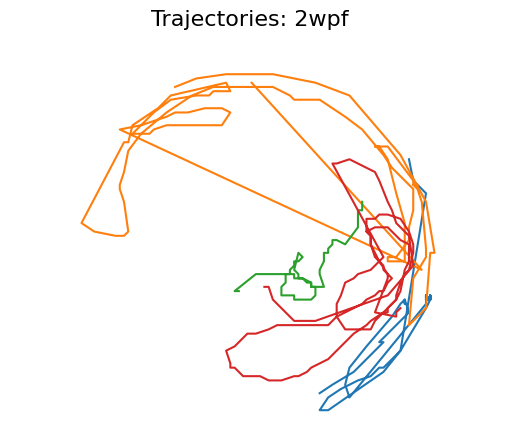

In [14]:
fig = ft.plot_trajectories(fish_2wpf_obj.foragersDF, "2wpf")
fig.show()

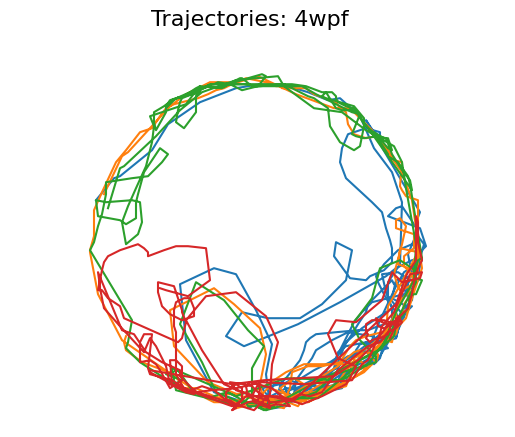

In [15]:
fig = ft.plot_trajectories(fish_4wpf_obj.foragersDF, "4wpf")
fig.show()

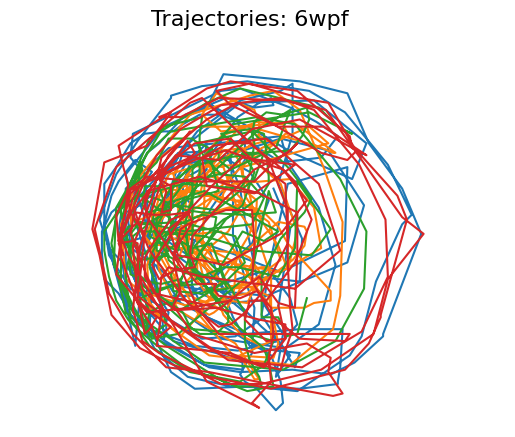

In [16]:
fig = ft.plot_trajectories(fish_6wpf_obj.foragersDF, "6wpf")
fig.show()

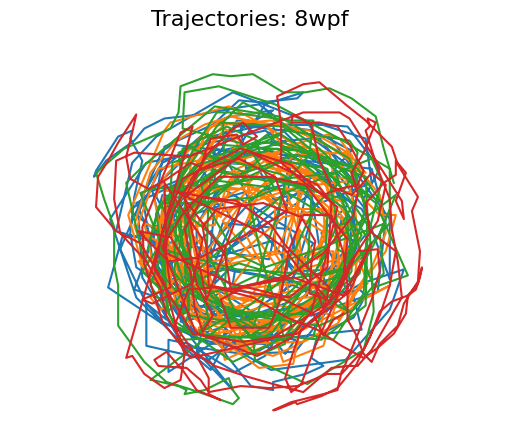

In [17]:
fig = ft.plot_trajectories(fish_8wpf_obj.foragersDF, "8wpf")
fig.show()

# Animations

In [18]:
ft.animate_foragers(
    fish_2wpf_obj, plot_rewards=False, width=600, height=600, point_size=6
)

In [19]:
ft.animate_foragers(
    fish_4wpf_obj, plot_rewards=False, width=600, height=600, point_size=6
)

In [20]:
ft.animate_foragers(
    fish_6wpf_obj, plot_rewards=False, width=600, height=600, point_size=6
)

In [21]:
ft.animate_foragers(
    fish_8wpf_obj, plot_rewards=False, width=600, height=600, point_size=6
)